In [254]:
import lime
import lime.lime_tabular
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [233]:
# Load training X data
data = np.loadtxt('train_FD001.txt', skiprows=0, unpack=False)
X = pd.DataFrame(data, columns=['Unit#','time','op1','op2','op3','s1','s2','s3','s4','s5',
                                      's6','s7','s8','s9','s10','s11','s12','s13','s14','s15',
                                      's16','s17','s18','s19','s20','s21'])

# Extract training Y data from X dataset (Since the engines have been run to failure
# we flip the time list for each engine)
Y = pd.DataFrame()
time = np.array([])
for i in range(100):
    engine = (data_pd.loc[X['Unit#'] == i+1])
    time = np.append(time, np.flip(np.array(engine['time'])))
Y = pd.DataFrame(time, columns=['time'])
Y = np.array(Y)[:,0]

In [234]:
# Load test data X
X_test_data = np.loadtxt('test_FD001.txt', skiprows=0, unpack=False)
X_test_data_pd = pd.DataFrame(X_test_data, 
                     columns=['Unit#','time','op1','op2','op3','s1','s2','s3','s4',
                              's5','s6','s7','s8','s9','s10','s11','s12','s13','s14',
                              's15','s16','s17','s18','s19','s20','s21'])
#X_test = X_test.drop(X_test.columns[len(X_test.columns)-1], axis=1, inplace=True)

Y_test_data = np.loadtxt('RUL_FD001.txt', skiprows=0, unpack=False)
Y_test = pd.DataFrame(Y_test_data, columns=['RUL'])
Y_test = np.array(Y_test)[:,0]

In [235]:
# Retrive the last element in each engine in test data
X_test_lst = np.zeros((100, X.shape[1]))
for i in range (int(X_test_data_pd['Unit#'].max())):
    engine = X.loc[X['Unit#'] == i+1]
    #print(engine.tail(1))
    X_test_lst[i] = engine.tail(1)

X_test = pd.DataFrame(X_test_lst, 
                 columns=['Unit#','time','op1','op2','op3','s1','s2','s3','s4',
                          's5','s6','s7','s8','s9','s10','s11','s12','s13','s14',
                          's15','s16','s17','s18','s19','s20','s21'])

In [236]:
# Remove columns with constant values to remove noise
removedColNames = []
for (colName, colData) in X.iteritems():
    maxVal = X[colName].max()
    minVal = X[colName].min()
    #print('Column Name : ', colName, '  Max Value: {}  '.format(maxVal), 'Min Value: {}'.format(minVal))
    if (minVal == maxVal):
        X = X.drop(columns=[colName])
        removedColNames.append(colName)

# Remove the same columns from the test dataset

X_test_data_pd = X_test_data_pd.drop(columns=removedColNames)
X_test = X_test.drop(columns=removedColNames)

In [237]:
print(X.shape)
print(Y.shape)
print(X_test.shape)
print(Y_test.shape)

(20631, 19)
(20631,)
(100, 19)
(100,)


In [294]:
#Using Random Forest:
clf_rf = RandomForestRegressor(n_estimators=40, max_depth=8
                               , random_state=0)
rf = clf_rf.fit(X, Y)
pred_train_rf = clf_rf.predict(X)
pred_test_rf = clf_rf.predict(X_test)
acc_train_rf = clf_rf.score(X, Y)
acc_test_rf = clf_rf.score(X_test, Y_test)

print('=================================\n       - RANDOM FOREST -')

print('\nRandom Forest Accuracy:\nTraining set:\t' + str(acc_train_rf))
print('Test set:\t{0:f}'.format(acc_test_rf))
print('=================================')

       - RANDOM FOREST -

Random Forest Accuracy:
Training set:	0.8823841418379973
Test set:	-2.786031


In [251]:
# Using Linear Regression
reg = LinearRegression().fit(X, Y)
acc_train_reg = reg.score(X, Y)
acc_test_reg = reg.score(X_test, Y_test)
print('=================================\n       - LINEAR REGRESSION -')

print('\nRandom Forest Accuracy:\nTraining set:\t' + str(acc_train_reg))
print('Test set:\t{0:f}'.format(acc_test_reg))
print('=================================')

       - LINEAR REGRESSION -

Random Forest Accuracy:
Training set:	0.6698572018608697
Test set:	-5.453100


In [287]:
X_np = np.array(X)
X_test_np = np.array(X_test)
#for (conlName) in X.iteritems():
 #   print(X[colName])
print(X_test_np)

[[ 1.00000e+00  1.92000e+02  9.00000e-04 ...  3.96000e+02  3.84800e+01
   2.29649e+01]
 [ 2.00000e+00  2.87000e+02 -5.00000e-04 ...  3.98000e+02  3.84300e+01
   2.30848e+01]
 [ 3.00000e+00  1.79000e+02  1.20000e-03 ...  3.98000e+02  3.84000e+01
   2.29562e+01]
 ...
 [ 9.80000e+01  1.56000e+02  7.70000e-03 ...  3.96000e+02  3.83300e+01
   2.31137e+01]
 [ 9.90000e+01  1.85000e+02 -1.90000e-03 ...  3.97000e+02  3.84900e+01
   2.31931e+01]
 [ 1.00000e+02  2.00000e+02 -3.20000e-03 ...  3.96000e+02  3.83700e+01
   2.30522e+01]]


In [283]:
feature_names = np.array(X.columns)
categorical_features = np.argwhere(np.array([len(set(X_np[:,x])) for x in range(X_np.shape[1])]) <= 20).flatten()

categorical_features
#np.array([len(set(X_np[:,x])) for x in range(X_np.shape[1])])
feature_names

array(['Unit#', 'time', 'op1', 'op2', 's2', 's3', 's4', 's6', 's7', 's8',
       's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20', 's21'],
      dtype=object)

In [285]:
# Using LIME
explainer = lime.lime_tabular.LimeTabularExplainer(X_np, feature_names=feature_names, class_names=['operations'], categorical_features=categorical_features, verbose=True, mode='regression')



In [307]:
i = 89
exp = explainer.explain_instance(X_test_np[i], rf.predict, num_features=10)

Intercept 133.30209821483317
Prediction_local [61.56656855]
Right: 4.7975077679748255


In [304]:
exp.show_in_notebook(show_table=True)

In [238]:
# Plot of what the data sets test_x and test_y actually look like

def plot_data(x_data, y_data, engine_number, feature):
    
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    ax.plot(x_data, y_data, color='b', marker='.')
    plt.title('Data from engine: {0}. \nFeature: {1}'.format(engine_number, feature), fontsize=20)
    plt.xlabel('Time', fontsize=16)
    plt.ylabel('Feature {}'.format(feature), fontsize=16)
    plt.legend(fontsize=14)
    plt.grid(True)
#    ax.set_ylim(np.amin(y_data), np.amax(y_data))
    print(np.amax(y_data))
    print(np.amin(y_data))
    plt.show()

100.0
100.0


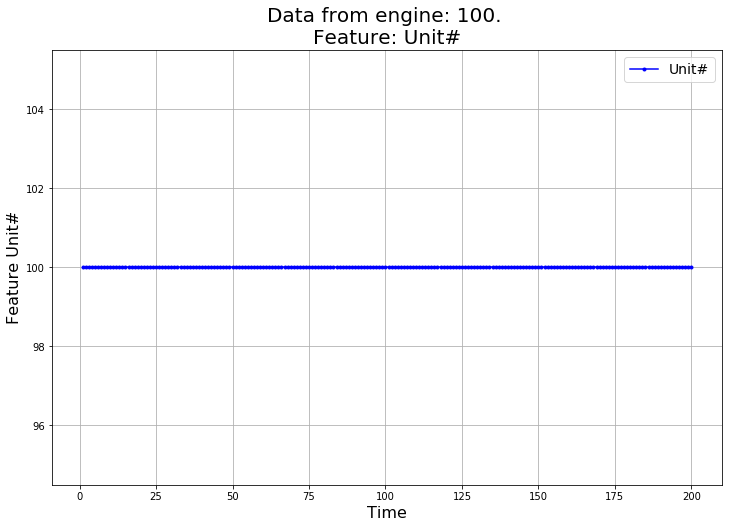

200.0
1.0


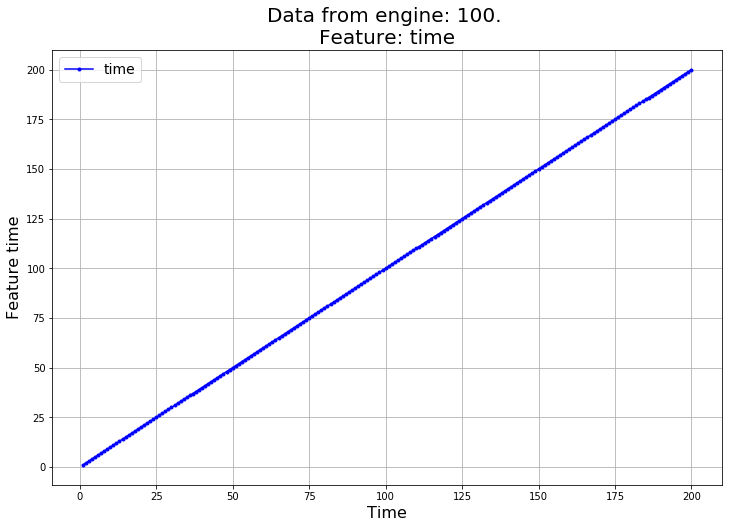

0.0056
-0.0052


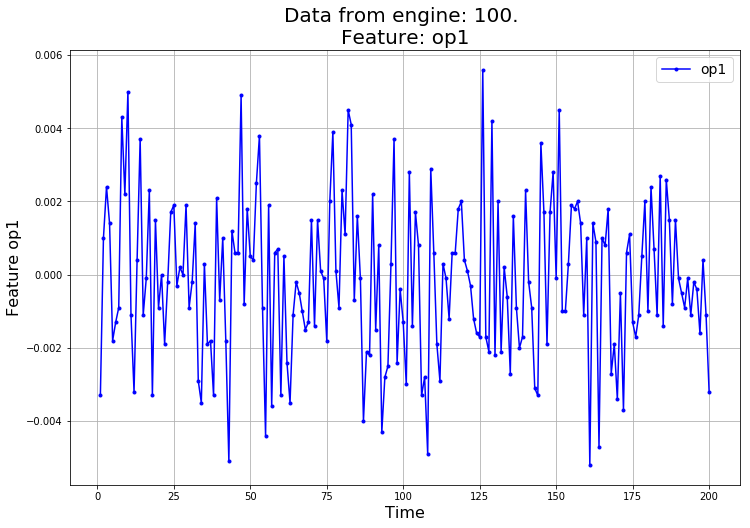

0.0004
-0.0006


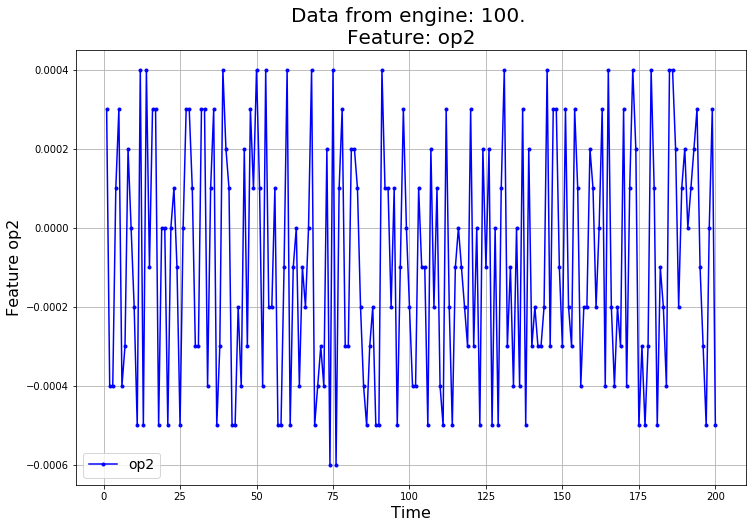

643.95
641.65


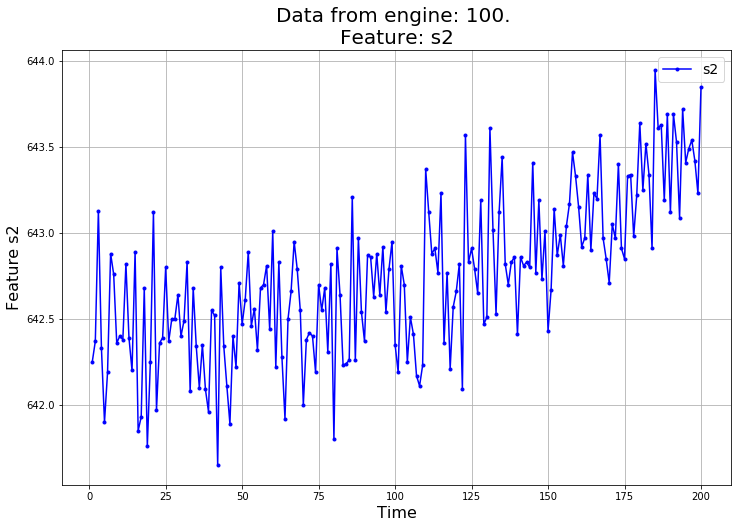

1610.87
1579.42


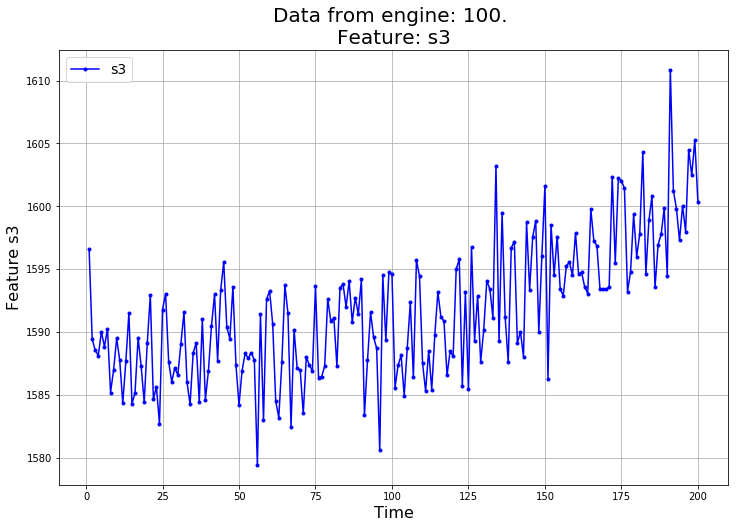

1433.58
1396.0


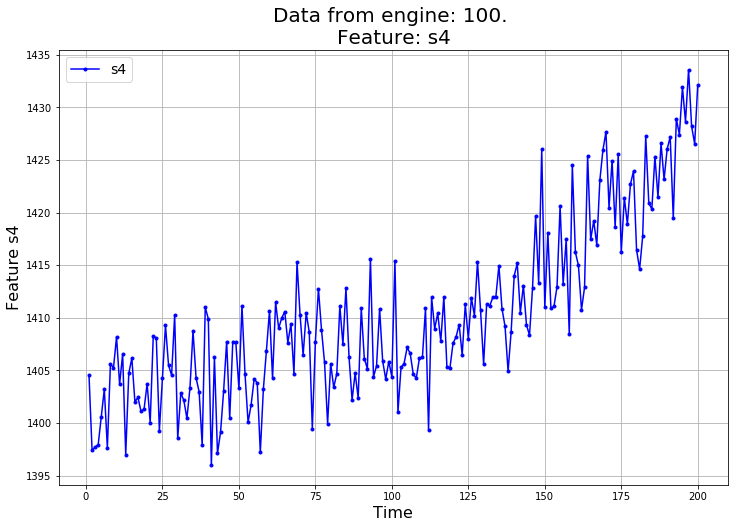

21.61
21.6


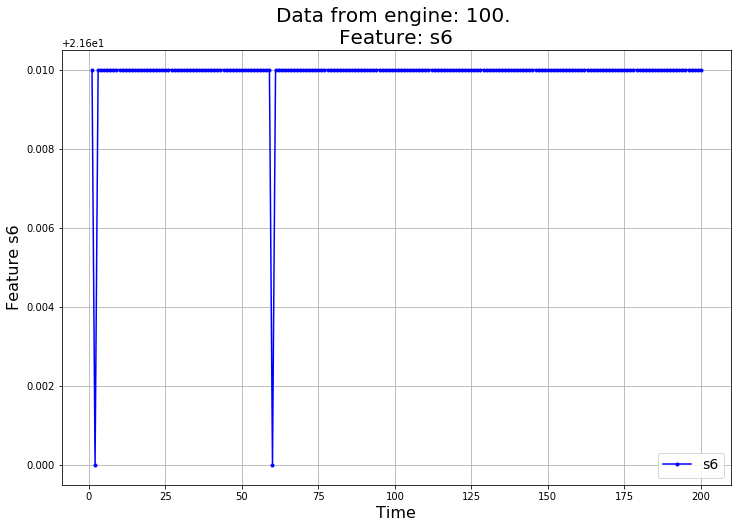

554.69
550.68


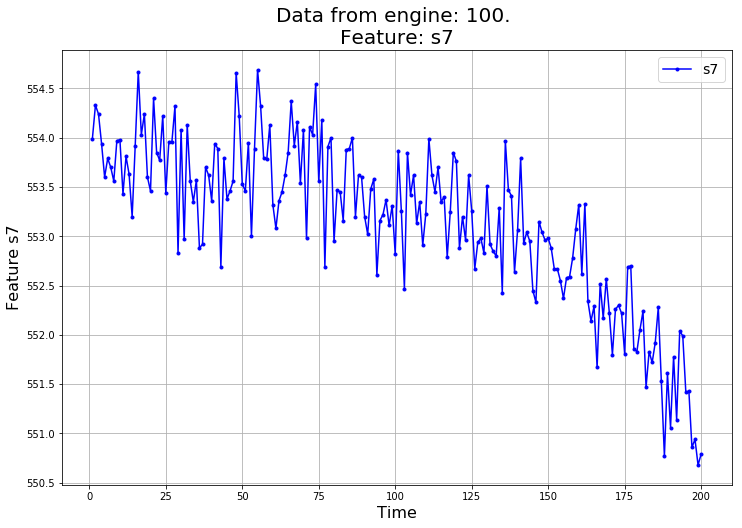

2388.29
2388.0


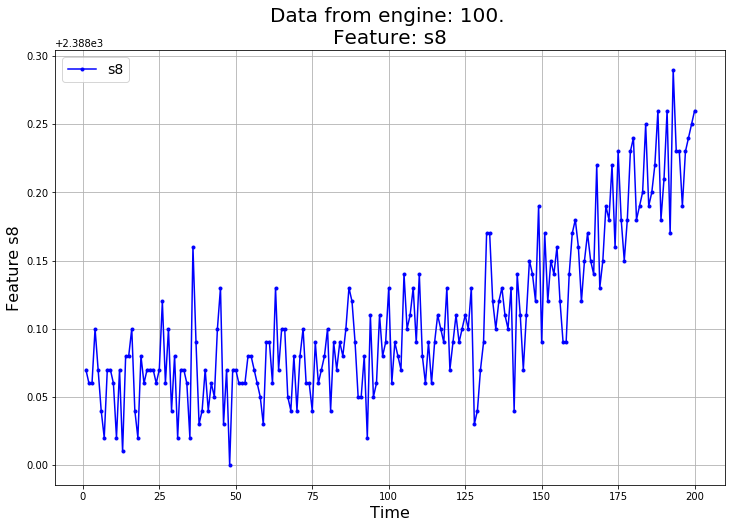

9076.28
9046.8


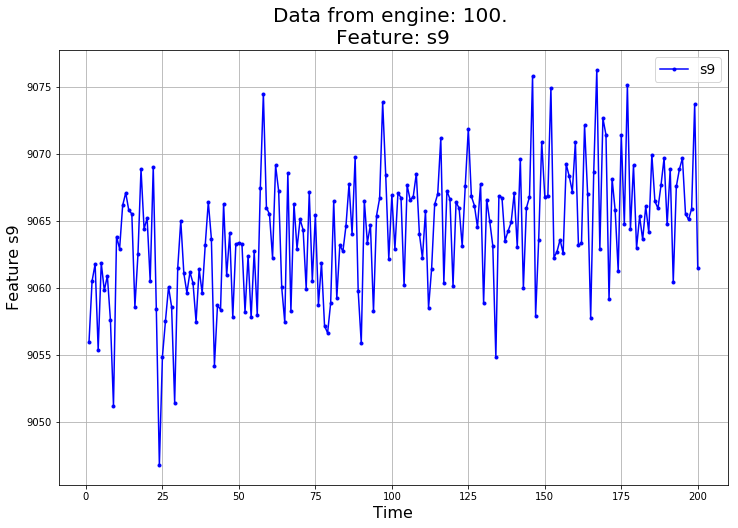

48.39
47.12


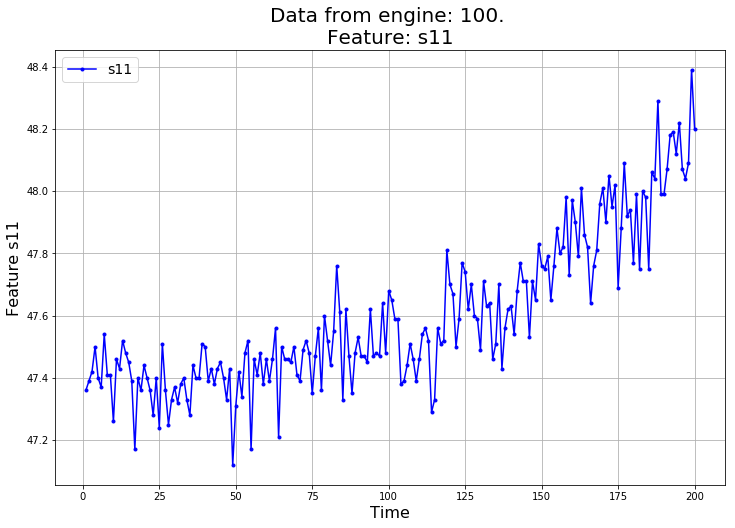

522.3
519.3


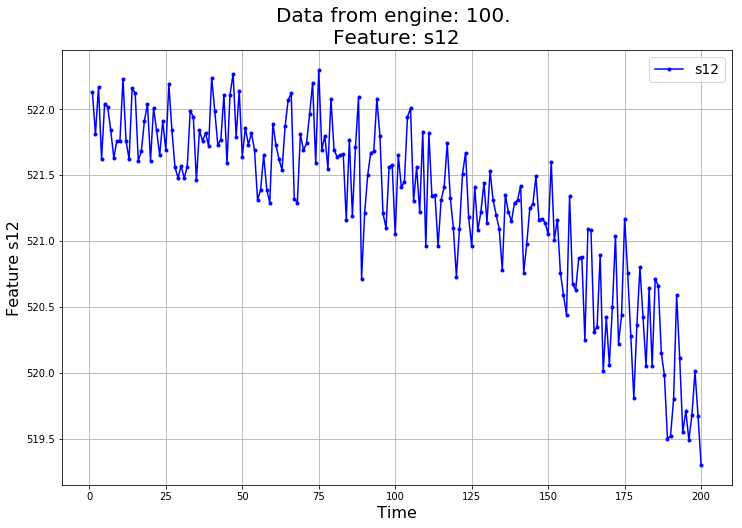

2388.28
2387.97


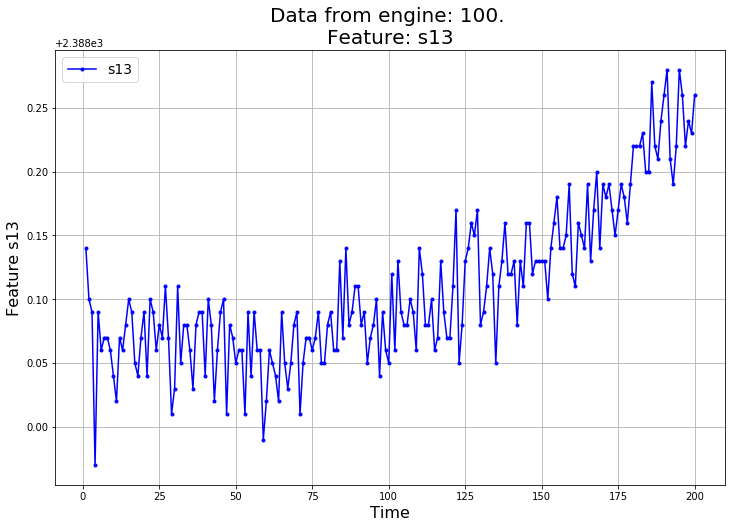

8150.68
8134.58


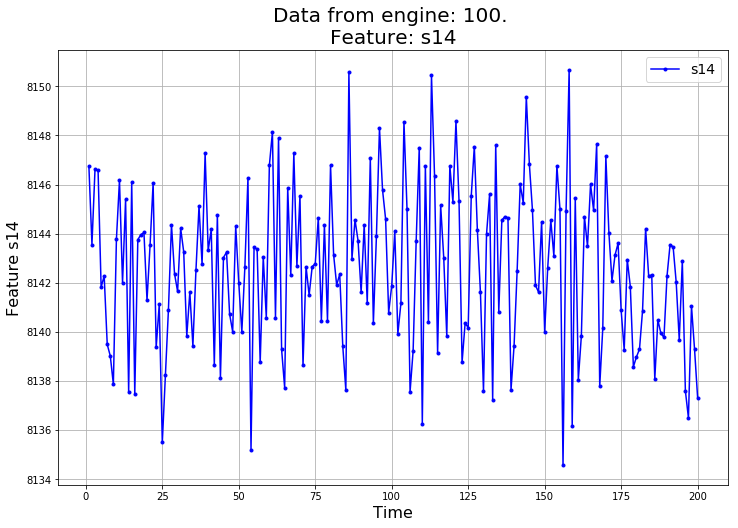

8.5646
8.365


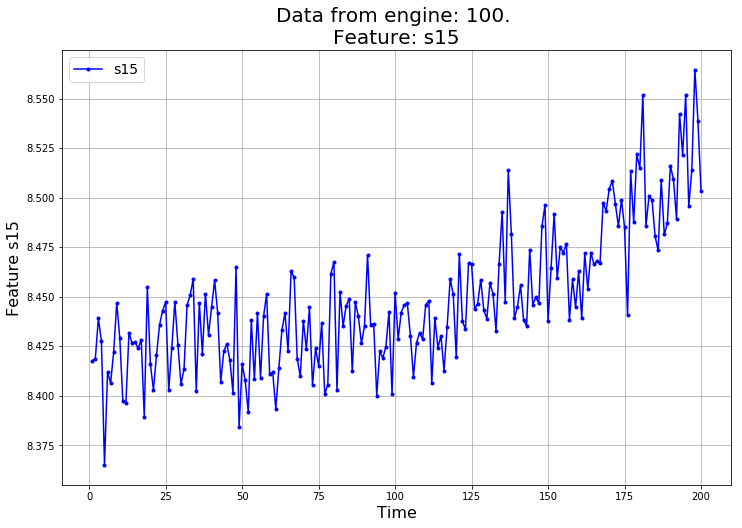

398.0
390.0


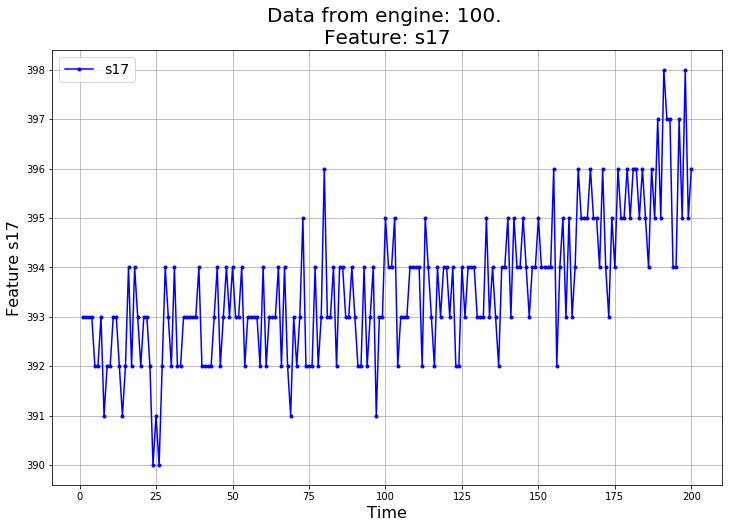

39.18
38.14


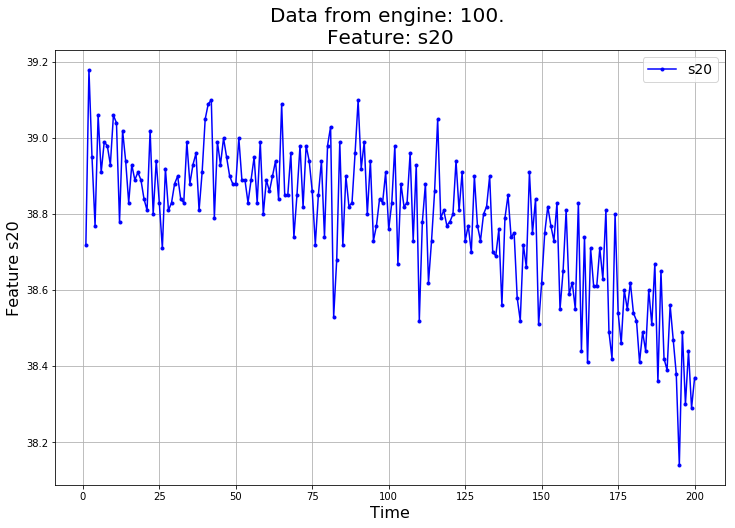

23.5751
22.9333


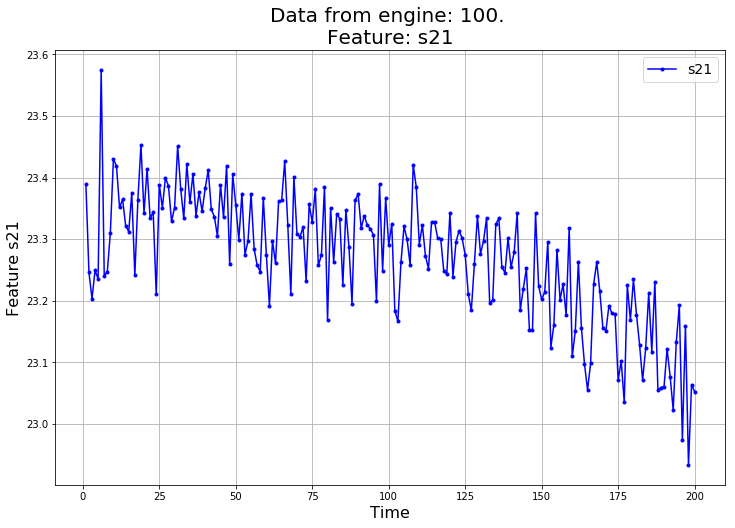

In [239]:

for (colName, colData) in X.iteritems():
    engine_number = 100
    engine = X.loc[X['Unit#'] == engine_number]
    feature = 's{}'.format(i+1)
    plot_data(engine['time'], engine[colName], engine_number, colName)